<a href="https://colab.research.google.com/github/yuppd28/Mashinne-navchannya/blob/main/%D0%9B%D0%919_%D0%9A%D0%BB%D1%8E%D1%88%D0%BD%D1%96%D1%87%D0%B5%D0%BD%D0%BA%D0%BE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving mushroom_cleaned.csv to mushroom_cleaned.csv


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
filename=list(uploaded.keys())[0]
df=pd.read_csv(filename)
df.head(5)

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
0,1372,2,2,10,3.807467,1545,11,1.804273,1
1,1461,2,2,10,3.807467,1557,11,1.804273,1
2,1371,2,2,10,3.612496,1566,11,1.804273,1
3,1261,6,2,10,3.787572,1566,11,1.804273,1
4,1305,6,2,10,3.711971,1464,11,0.943195,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54035 entries, 0 to 54034
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   cap-diameter     54035 non-null  int64  
 1   cap-shape        54035 non-null  int64  
 2   gill-attachment  54035 non-null  int64  
 3   gill-color       54035 non-null  int64  
 4   stem-height      54035 non-null  float64
 5   stem-width       54035 non-null  int64  
 6   stem-color       54035 non-null  int64  
 7   season           54035 non-null  float64
 8   class            54035 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 3.7 MB


In [ ]:
df.shape

(54035, 9)

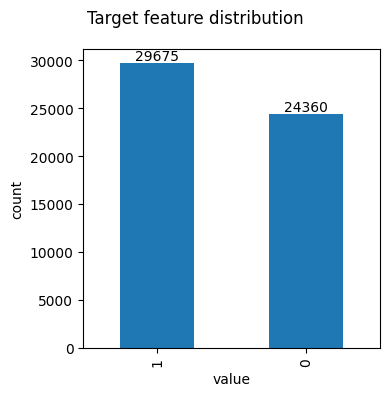

In [ ]:
ax=df['class'].value_counts().plot(kind='bar',figsize=(4,4))
for i in ax.containers:
  ax.bar_label(i)
  ax.set_xlabel("value")
  ax.set_ylabel("count")

plt.suptitle("Target feature distribution")
plt.tight_layout()
plt.show()

In [ ]:
df.describe()

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
count,54035.000000,54035.000000,54035.000000,54035.000000,54035.000000,54035.000000,54035.000000,54035.000000,54035.000000
mean,567.257204,4.000315,2.142056,7.329509,0.759110,1051.081299,8.418062,0.952163,0.549181
std,359.883763,2.160505,2.228821,3.200266,0.650969,782.056076,3.262078,0.305594,0.497580
min,0.000000,0.000000,0.000000,0.000000,0.000426,0.000000,0.000000,0.027372,0.000000
25%,289.000000,2.000000,0.000000,5.000000,0.270997,421.000000,6.000000,0.888450,0.000000
50%,525.000000,5.000000,1.000000,8.000000,0.593295,923.000000,11.000000,0.943195,1.000000
75%,781.000000,6.000000,4.000000,10.000000,1.054858,1523.000000,11.000000,0.943195,1.000000
max,1891.000000,6.000000,6.000000,11.000000,3.835320,3569.000000,12.000000,1.804273,1.000000


In [ ]:
df.isnull().sum()

,0
cap-diameter,0
cap-shape,0
gill-attachment,0
gill-color,0
stem-height,0
stem-width,0
stem-color,0
season,0
class,0


In [ ]:
correlation_matrix=df.corr()
correlation_with_class=correlation_matrix['class']
correlation_with_class

,class
cap-diameter,-0.165676
cap-shape,-0.133338
gill-attachment,-0.052541
gill-color,-0.063947
stem-height,0.183354
stem-width,-0.182856
stem-color,-0.128339
season,-0.082919
class,1.000000


In [ ]:
correlation_matrix

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
cap-diameter,1.000000,0.204011,0.200481,0.186377,0.135652,0.828469,0.121856,0.113334,-0.165676
cap-shape,0.204011,1.000000,0.043066,0.131387,-0.010393,0.222494,0.029035,0.055442,-0.133338
gill-attachment,0.200481,0.043066,1.000000,0.100276,-0.075284,0.245300,0.020073,-0.040315,-0.052541
gill-color,0.186377,0.131387,0.100276,1.000000,0.015057,0.110283,0.186090,0.059965,-0.063947
stem-height,0.135652,-0.010393,-0.075284,0.015057,1.000000,0.098095,0.002624,-0.000292,0.183354
stem-width,0.828469,0.222494,0.245300,0.110283,0.098095,1.000000,0.157394,0.040679,-0.182856
stem-color,0.121856,0.029035,0.020073,0.186090,0.002624,0.157394,1.000000,0.010750,-0.128339
season,0.113334,0.055442,-0.040315,0.059965,-0.000292,0.040679,0.010750,1.000000,-0.082919
class,-0.165676,-0.133338,-0.052541,-0.063947,0.183354,-0.182856,-0.128339,-0.082919,1.000000


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,accuracy_score

In [ ]:
y=df['class']
X=df.drop('class',axis=1)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [ ]:
models={
    'Random Forest':{
        'model': RandomForestClassifier(random_state=42),
        'params':{
            'n_estimators':[100,200],
            'max_depth':[None,10,20],
            'min_samples_split':[2,5]
        }
        },
    'Logistic Reggression':{
        'model':LogisticRegression(random_state=42,max_iter=10000),
        'params':{
            'C':[0.1,1,10],
            'solver':['liblinear','lbfgs']
        }
    },
    'K-Nearest Neighbors':{
        'model':KNeighborsClassifier(),
        'params':{
            'n_neighbors':[3,5,7],
            'weights':['uniform','distance'],
            'metric':['euclidean','manhattan']
        }
    }
}

In [ ]:
for name, model_info in models.items():
  grid_search=GridSearchCV(model_info['model'],model_info['params'],cv=5,scoring='accuracy',n_jobs=-1)
  grid_search.fit(X_train,y_train)

  best_model=grid_search.best_estimator_
  y_pred=best_model.predict(X_test)

  print(f"Model:{name}")
  print(f"Best Purams:{grid_search.best_params_}")
  print(f"Accuracy:{accuracy_score(y_test,y_pred)}")
  print(classification_report(y_test,y_pred))
  print("-"*50)



Model:Random Forest
Best Purams:{'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 200}
Accuracy:0.9908703966442539
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      7349
           1       0.99      0.99      0.99      8862

    accuracy                           0.99     16211
   macro avg       0.99      0.99      0.99     16211
weighted avg       0.99      0.99      0.99     16211

--------------------------------------------------
Model:Logistic Reggression
Best Purams:{'C': 0.1, 'solver': 'lbfgs'}
Accuracy:0.6352476713342792
              precision    recall  f1-score   support

           0       0.61      0.53      0.57      7349
           1       0.65      0.72      0.68      8862

    accuracy                           0.64     16211
   macro avg       0.63      0.63      0.63     16211
weighted avg       0.63      0.64      0.63     16211

--------------------------------------------------
Model:K-Nearest Neighbor

In [ ]:
df.head()

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
0,1372,2,2,10,3.807467,1545,11,1.804273,1
1,1461,2,2,10,3.807467,1557,11,1.804273,1
2,1371,2,2,10,3.612496,1566,11,1.804273,1
3,1261,6,2,10,3.787572,1566,11,1.804273,1
4,1305,6,2,10,3.711971,1464,11,0.943195,1


In [ ]:
correlation_with_class=correlation_matrix['class']
print(correlation_with_class)

cap-diameter      -0.165676
cap-shape         -0.133338
gill-attachment   -0.052541
gill-color        -0.063947
stem-height        0.183354
stem-width        -0.182856
stem-color        -0.128339
season            -0.082919
class              1.000000
Name: class, dtype: float64


In [ ]:
y=df['class']
X=df[['cap-diameter','cap-shape','stem-height','stem-width']]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

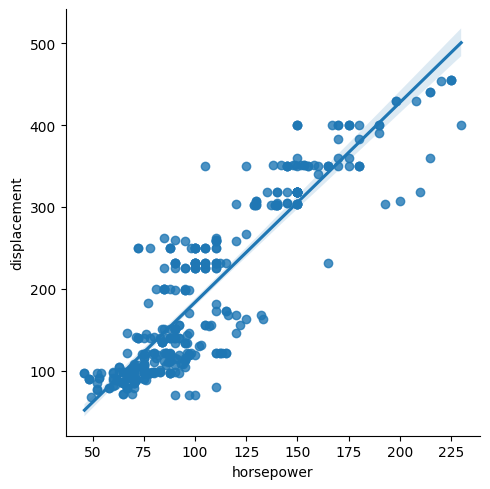

In [ ]:
import seaborn as sns

data=sns.load_dataset('mpg')
sns.lmplot(x="horsepower",y="displacement",data=data)

<Axes: xlabel='horsepower', ylabel='displacement'>

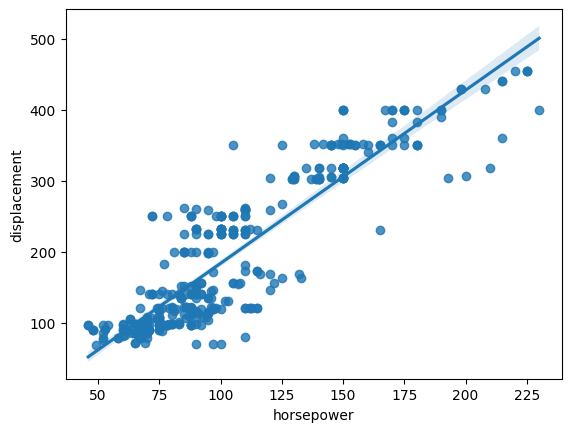

In [ ]:
sns.regplot(x="horsepower",y="displacement",data=data)

<Axes: xlabel='horsepower', ylabel='displacement'>

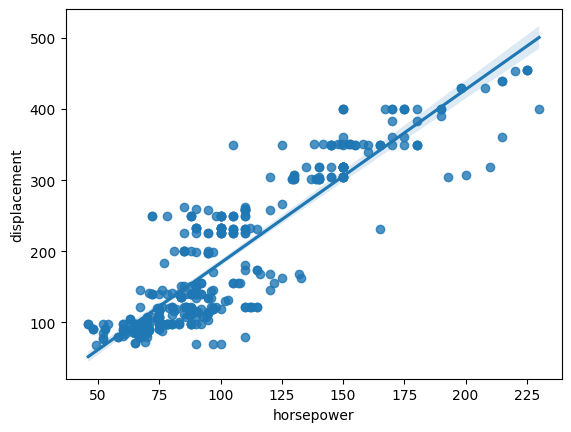

In [ ]:
sns.regplot(x="horsepower",y="displacement",data=data)

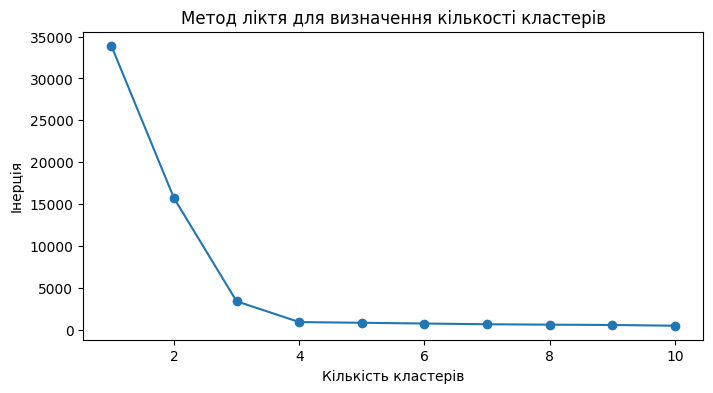

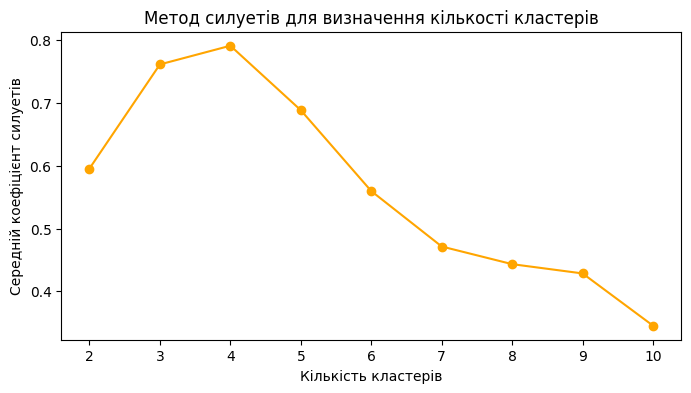

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score

X, _ = make_blobs(n_samples=500, centers=4, cluster_std=1.0, random_state=42)

#Метод ліктя
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(k_range, inertia, marker='o')
plt.title('Метод ліктя для визначення кількості кластерів')
plt.xlabel('Кількість кластерів')
plt.ylabel('Інерція')
plt.show()

#Метод силуетів
silhouette_scores = []

for k in k_range[1:]:  # k має бути >= 2
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    score = silhouette_score(X, kmeans.labels_)
    silhouette_scores.append(score)


plt.figure(figsize=(8, 4))
plt.plot(k_range[1:], silhouette_scores, marker='o', color='orange')
plt.title('Метод силуетів для визначення кількості кластерів')
plt.xlabel('Кількість кластерів')
plt.ylabel('Середній коефіцієнт силуетів')
plt.show()


Висновок:  Дослідження показало високу кореляцію між деякими характеристиками грибів та їхньою класифікацією (їстівний/отруйний).
#Модель Випадкового лісу продемонструвала вищу точність порівняно з логістичною регресією.
#Оптимальна кількість кластерів була визначена за допомогою методу ліктя та силуетів.
#Візуалізація підтвердила ефективність кластеризації, показавши чіткі групи грибів